# Quantile Regression

The NAG function [`correg.quantile_linreg_easy`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.correg.html#naginterfaces.library.correg.quantile_linreg_easy) can be used to model the conditional $\tau$-th quantile of a dependent variable against one or more independent or explanatory variables.

Whereas the method of least squares results in estimates of the conditional <em>mean</em> of the response (dependent)  variable, quantile regression gives estimates of the conditional <em>median</em> (or any other quantile) of the response variable.

In our example below the dependent variable is household food expenditure, which is regressed against household income. The data is from a study of 1857 by Engels.

In [1]:
income = [
    420.1577, 541.4117, 901.1575, 639.0802, 750.8756, 945.7989, 829.3979, 979.1648,
    1309.8789, 1492.3987, 502.8390, 616.7168, 790.9225, 555.8786, 713.4412, 838.7561,
    535.0766, 596.4408, 924.5619, 487.7583, 692.6397, 997.8770, 506.9995, 654.1587,
    933.9193, 433.6813, 587.5962, 896.4746, 454.4782, 584.9989, 800.7990, 502.4369,
    713.5197, 906.0006, 880.5969, 796.8289, 854.8791, 1167.3716, 523.8000, 670.7792,
    377.0584, 851.5430, 1121.0937, 625.5179, 805.5377, 558.5812, 884.4005, 1257.4989,
    2051.1789, 1466.3330, 730.0989, 2432.3910, 940.9218, 1177.8547, 1222.5939, 1519.5811,
    687.6638, 953.1192, 953.1192, 953.1192, 939.0418, 1283.4025, 1511.5789, 1342.5821,
    511.7980, 689.7988, 1532.3074, 1056.0808, 387.3195, 387.3195, 410.9987, 499.7510,
    832.7554, 614.9986, 887.4658, 1595.1611, 1807.9520, 541.2006, 1057.6767, 800.7990,
    1245.6964, 1201.0002, 634.4002, 956.2315, 1148.6010, 1768.8236, 2822.5330, 922.3548,
    2293.1920, 627.4726, 889.9809, 1162.2000, 1197.0794, 530.7972, 1142.1526, 1088.0039,
    484.6612, 1536.0201, 678.8974, 671.8802, 690.4683, 860.6948, 873.3095, 894.4598,
    1148.6470, 926.8762, 839.0414, 829.4974, 1264.0043, 1937.9771, 698.8317, 920.4199,
    1897.5711, 891.6824, 889.6784, 1221.4818, 544.5991, 1031.4491, 1462.9497, 830.4353,
    975.0415, 1337.9983, 867.6427, 725.7459, 989.0056, 1525.0005, 672.1960, 923.3977,
    472.3215, 590.7601, 831.7983, 1139.4945, 507.5169, 576.1972, 696.5991, 650.8180,
    949.5802, 497.1193, 570.1674, 724.7306, 408.3399, 638.6713, 1225.7890, 715.3701,
    800.4708, 975.5974, 1613.7565, 608.5019, 958.6634, 835.9426, 1024.8177, 1006.4353,
    726.0000, 494.4174, 776.5958, 415.4407, 581.3599, 643.3571, 2551.6615, 1795.3226,
    1165.7734, 815.6212, 1264.2066, 1095.4056, 447.4479, 1178.9742, 975.8023, 1017.8522,
    423.8798, 558.7767, 943.2487, 1348.3002, 2340.6174, 587.1792, 1540.9741, 1115.8481,
    1044.6843, 1389.7929, 2497.7860, 1585.3809, 1862.0438, 2008.8546, 697.3099, 571.2517,
    598.3465, 461.0977, 977.1107, 883.9849, 718.3594, 543.8971, 1587.3480, 4957.8130,
    969.6838, 419.9980, 561.9990, 689.5988, 1398.5203, 820.8168, 875.1716, 1392.4499,
    1256.3174, 1362.8590, 1999.2552, 1209.4730, 1125.0356, 1827.4010, 1014.1540, 880.3944,
    873.7375, 951.4432, 473.0022, 601.0030, 713.9979, 829.2984, 959.7953, 1212.9613,
    958.8743, 1129.4431, 1943.0419, 539.6388, 463.5990, 562.6400, 736.7584, 1415.4461,
    2208.7897, 636.0009, 759.4010, 1078.8382, 748.6413, 987.6417, 788.0961, 1020.0225,
    1230.9235, 440.5174, 743.0772,
]
expenditure = [
    255.8394, 310.9587, 485.6800, 402.9974, 495.5608, 633.7978, 630.7566,
    700.4409, 830.9586, 815.3602, 338.0014, 412.3613, 520.0006, 452.4015,
    512.7201, 658.8395, 392.5995, 443.5586, 640.1164, 333.8394, 466.9583,
    543.3969, 317.7198, 424.3209, 518.9617, 338.0014, 419.6412, 476.3200,
    386.3602, 423.2783, 503.3572, 354.6389, 497.3182, 588.5195, 654.5971,
    550.7274, 528.3770, 640.4813, 401.3204, 435.9990, 276.5606, 588.3488,
    664.1978, 444.8602, 462.8995, 377.7792, 553.1504, 810.8962, 1067.9541,
    1049.8788, 522.7012, 1424.8047, 517.9196, 830.9586, 925.5795, 1162.0024,
    383.4580, 621.1173, 621.1173, 621.1173, 548.6002, 745.2353, 837.8005,
    795.3402, 418.5976, 508.7974, 883.2780, 742.5276, 242.3202, 242.3202,
    266.0010, 408.4992, 614.7588, 385.3184, 515.6200, 1138.1620, 993.9630,
    299.1993, 750.3202, 572.0807, 907.3969, 811.5776, 427.7975, 649.9985,
    860.6002, 1143.4211, 2032.6792, 590.6183, 1570.3911, 483.4800, 600.4804,
    696.2021, 774.7962, 390.5984, 612.5619, 708.7622, 296.9192, 1071.4627,
    496.5976, 503.3974, 357.6411, 430.3376, 624.6990, 582.5413, 580.2215,
    543.8807, 588.6372, 627.9999, 712.1012, 968.3949, 482.5816, 593.1694,
    1033.5658, 693.6795, 693.6795, 761.2791, 361.3981, 628.4522, 771.4486,
    757.1187, 821.5970, 1022.3202, 679.4407, 538.7491, 679.9981, 977.0033,
    561.2015, 728.3997, 372.3186, 361.5210, 620.8006, 819.9964, 360.8780,
    395.7608, 442.0001, 404.0384, 670.7993, 297.5702, 353.4882, 383.9376,
    284.8008, 431.1000, 801.3518, 448.4513, 577.9111, 570.5210, 865.3205,
    444.5578, 680.4198, 576.2779, 708.4787, 734.2356, 433.0010, 327.4188,
    485.5198, 305.4390, 468.0008, 459.8177, 863.9199, 831.4407, 534.7610,
    392.0502, 934.9752, 813.3081, 263.7100, 769.0838, 630.5863, 645.9874,
    319.5584, 348.4518, 614.5068, 662.0096, 1504.3708, 406.2180, 692.1689,
    588.1371, 511.2609, 700.5600, 1301.1451, 879.0660, 912.8851, 1509.7812,
    484.0605, 399.6703, 444.1001, 248.8101, 527.8014, 500.6313, 436.8107,
    374.7990, 726.3921, 1827.2000, 523.4911, 334.9998, 473.2009, 581.2029,
    929.7540, 591.1974, 637.5483, 674.9509, 776.7589, 959.5170, 1250.9643,
    737.8201, 810.6772, 983.0009, 708.8968, 633.1200, 631.7982, 608.6419,
    300.9999, 377.9984, 397.0015, 588.5195, 681.7616, 807.3603, 696.8011,
    811.1962, 1305.7201, 442.0001, 353.6013, 468.0008, 526.7573, 890.2390,
    1318.8033, 331.0005, 416.4015, 596.8406, 429.0399, 619.6408, 400.7990,
    775.0209, 772.7611, 306.5191, 522.6019,
]

In the design matrix for the regression we include an intercept term by augmenting the income data set with a column of ones

In [2]:
income_X = [[1., incomei] for incomei in income]

Our quantiles of interest

In [3]:
tau = [0.1, 0.5, 0.9]

Compute the regression

In [4]:
from naginterfaces.library import correg
regn = correg.quantile_linreg_easy(income_X, expenditure, tau)

The regression coefficients are returned in attribute `b` of the function's return tuple.

For the plot, compute the regression lines

In [5]:
import numpy as np
plot_x = np.linspace(0, max(income))
plot_ys = [regn.b[0, i] + regn.b[1, i]*plot_x for i in range(len(tau))]

Make a scatter plot of the original income data (without the intercept) and add in the regression lines

<IPython.core.display.Javascript object>


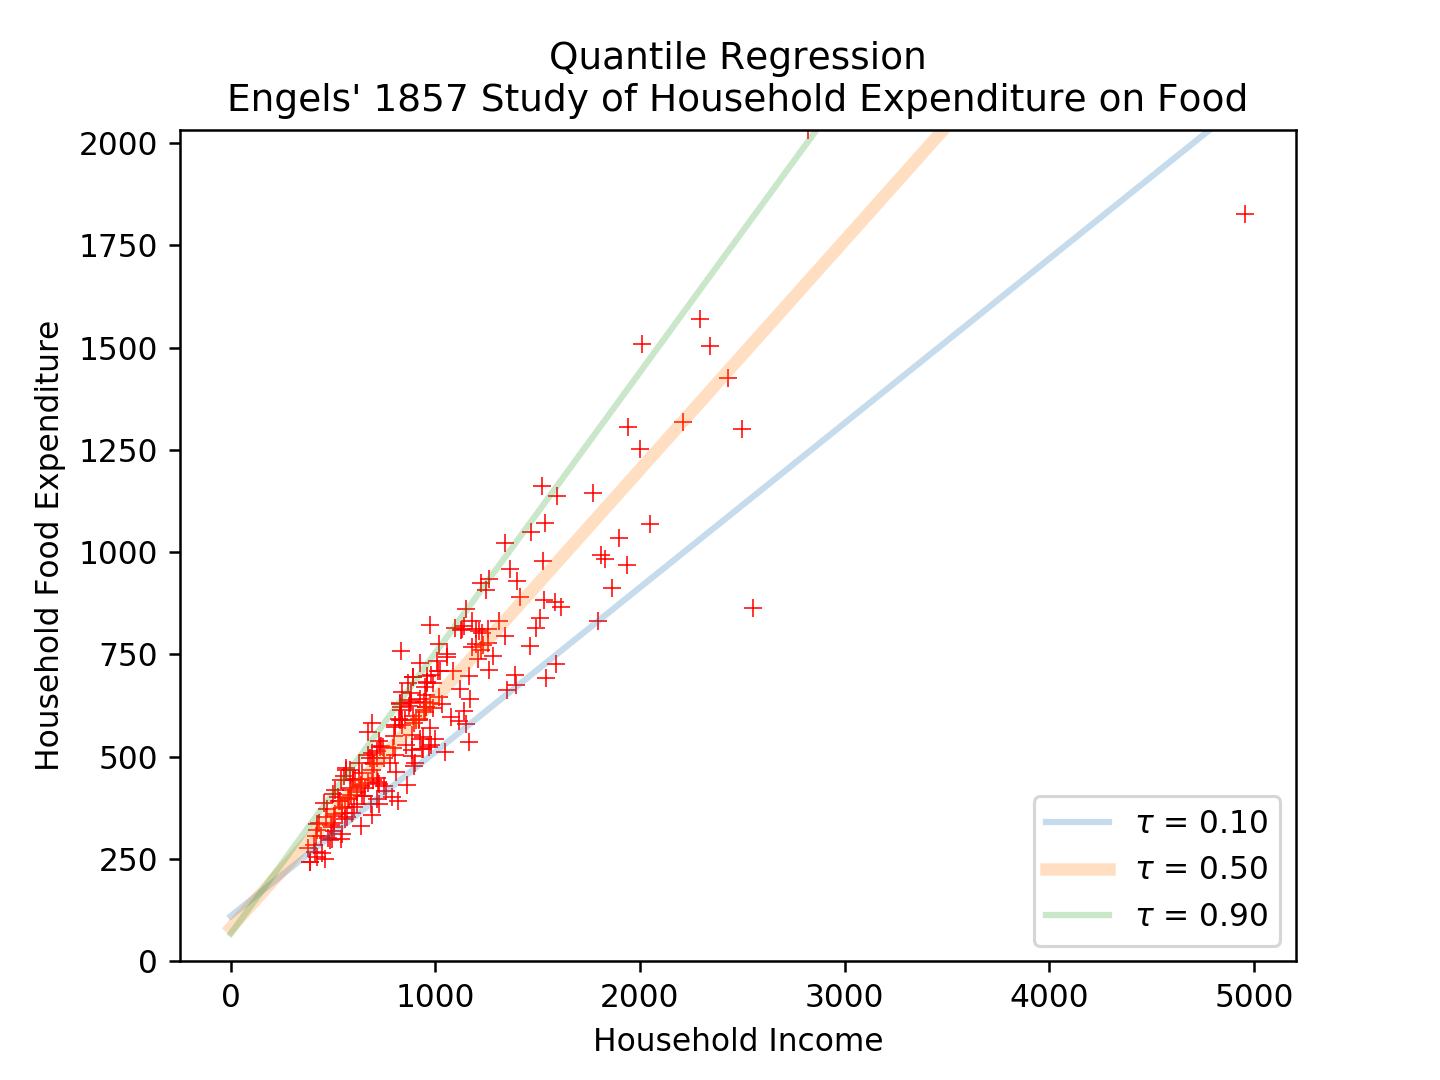

In [6]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
plt.scatter(income, expenditure, c='red', marker='+', linewidth=0.5)
for tau_i, tau_val in enumerate(tau):
    plt.plot(
        plot_x, plot_ys[tau_i],
        label=r'$\tau$ = {:.2f}'.format(tau_val),
        linewidth=(4 if tau_val == 0.5 else 2),
        alpha=0.25,
    )
plt.ylim((0., max(expenditure)))
plt.xlabel('Household Income')
plt.ylabel('Household Food Expenditure')
plt.legend(loc='lower right')
plt.title(
    'Quantile Regression\n'
    'Engels\' 1857 Study of Household Expenditure on Food'
)
plt.show()